# Uvod #

Prisjetite se primjera iz prethodne lekcije da će Keras voditi povijest gubitka učenja i validacije tijekom epoha u kojima obučava model. U ovom dijelu vježbe ćemo naučiti kako interpretirati ove krivulje učenja i kako ih možemo koristiti za usmjeravanje razvoja modela. Konkretno, ispitat ćemo krivulje učenja za dokaze *underfitting* i *overfitting* i pogledati nekoliko strategija za ispravljanje toga.

# Interpretacija krivulja učenja #

Možete misliti da su informacije u podacima o obuci dvije vrste: *signal* i *šum*. Signal je dio koji generalizira, dio koji može pomoći našem modelu da napravi predviđanja na temelju novih podataka. Šum je onaj dio koji vrijedi *samo* za podatke o vježbanju; šum je sva slučajna fluktuacija koja dolazi iz podataka u stvarnom svijetu ili svi slučajni, neinformativni obrasci koji zapravo ne mogu pomoći modelu da predvidi. Šum je dio koji bi mogao izgledati koristan, ali zapravo nije.

Model treniramo odabirom težina ili parametara koji minimiziraju gubitak na setu za vježbanje. Možda znate, međutim, da za točnu procjenu performansi modela, moramo ga ocijeniti na novom skupu podataka, podacima o *validaciji*.

Kada treniramo model, iscrtavamo gubitak na setu za obuku epohu po epohu. Ovome ćemo dodati i grafikon podataka za provjeru valjanosti. Ove dijagrame nazivamo **krivuljama učenja**. Da bismo učinkovito trenirali modele dubokog učenja, moramo ih moći interpretirati.

<figure style="padding: 1em;">
<img src="figs/tHiVFnM.png" width="500" alt="A graph of training and validation loss.">
<figcaption style="textalign: center; font-style: italic"><center>Gubitak provjere valjanosti daje procjenu očekivane pogreške na nevidljivim podacima.
</center></figcaption>
</figure>

Sada će se gubitak uvježbavanja smanjiti ili kada model nauči signal ili kada nauči šum. Ali gubitak valjanosti smanjit će se samo kada model nauči signal. (Kakav god šum model naučio iz skupa za obuku neće se generalizirati na nove podatke.) Dakle, kada model nauči signal obje krivulje padaju, ali kada nauči šum u krivuljama se stvara *praznina*. Veličina razmaka govori koliko je šuma model naučio.

U idealnom slučaju, stvorili bismo modele koji uče sav signal i ništa od šuma. To se praktički nikada neće dogoditi. Umjesto toga možemo postići da model sazna više signala po cijenu saznanja više buke. Sve dok je trgovina u našu korist, gubitak valjanosti nastavit će se smanjivati. Međutim, nakon određene točke trgovina se može okrenuti protiv nas, trošak premašuje korist, a gubitak valjanosti počinje rasti.

<figure style="padding: 1em;">
<img src="figs/eUF6mfo.png" width="600" alt="Two graphs. On the left, a line through a few data points with the true fit a parabola. On the right, a curve running through each datapoint with the true fit a parabola.">
<figcaption style="textalign: center; font-style: italic"><center>Nedovoljno i previše opremljeno.
</center></figcaption>
</figure>

Ovaj kompromis ukazuje na to da se mogu pojaviti dva problema prilikom uvježbavanja modela: nedovoljno signala ili previše šuma. **Underfitting** skupa za vježbanje je kada gubitak nije toliko nizak koliko bi mogao biti jer model nije naučio dovoljno *signala*. **Overfitting** seta za vježbanje je kada gubitak nije toliko nizak koliko bi mogao biti jer je model naučio previše *šuma*. Trik u treniranju modela dubokog učenja je pronalaženje najbolje ravnoteže između to dvoje.

Pogledat ćemo nekoliko načina za dobivanje više signala iz podataka o vježbanju uz smanjenje količine šuma.

# Kapacitet #

**Kapacitet** modela odnosi se na veličinu i složenost uzoraka koje može naučiti. Za neuronske mreže, to će u velikoj mjeri biti određeno koliko neurona ima i kako su međusobno povezani. Ako se čini da vaša mreža nema dovoljno podataka, pokušajte povećati njezin kapacitet.

Možete povećati kapacitet mreže tako da je učinite *širom* (više jedinica na postojeće slojeve) ili tako da je učinite *dubljom* (dodavanjem više slojeva). Šire mreže lakše uče linearne odnose, dok dublje mreže preferiraju nelinearne odnose. Što je bolje ovisi samo o skupu podataka.

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

U vježbi ćete istražiti kako kapacitet mreže može utjecati na njenu izvedbu.

# Rano zaustavljanje #

Spomenuli smo da kada model previše revno uči buku, gubitak valjanosti može početi rasti tijekom učenja. Da bismo to spriječili, možemo jednostavno zaustaviti učenje kad god se čini da se gubitak validacije više ne smanjuje. Prekid treninga na ovaj način naziva se **rano zaustavljanje**.

<figure style="padding: 1em;">
<img src="figs/eP0gppr.png" width=500 alt="A graph of the learning curves with early stopping at the minimum validation loss, underfitting to the left of it and overfitting to the right.">
<figcaption style="textalign: center; font-style: italic"><center>Čuvamo model gdje je validation loss minimalan.
</center></figcaption>
</figure>

Nakon što otkrijemo da gubitak valjanosti ponovno počinje rasti, možemo resetirati težine natrag na mjesto gdje se dogodio minimum. Ovo osigurava da model neće nastaviti učiti šum i pretjerati podatke.

Vježbanje s ranim zaustavljanjem također znači da smo u manjoj opasnosti od preranog prekidanja treninga, prije nego što mreža završi s učenjem signala. Samo postavite svoje epohe treninga na veliki broj (više nego što vam je potrebno), a rano zaustavljanje će se pobrinuti za ostalo.

## Dodavanje ranog zaustavljanja ##

U Kerasu uključujemo rano zaustavljanje u našem treningu putem povratnog poziva. **Callback** samo je funkcija koju želite pokrenuti povremeno dok se mreža trenira. Povratni poziv ranog zaustavljanja pokrenut će se nakon svake epohe. (Keras ima [različite tipove callback funkcija](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks), ali možete i [difinirati svoju](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).)

In [1]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Ovi parametri kažu: "Ako nije došlo do poboljšanja od najmanje 0,001 u gubitku validacije tijekom prethodnih 20 epoha, tada zaustavite učenje i zadržite najbolji model koji ste pronašli."

Kao što ćemo vidjeti u našem primjeru, ovaj ćemo povratni poziv proslijediti metodi `fit` zajedno s gubitkom i optimizatorom.

# Primjer - treniranje modela s ranim zaustavljanjem #

Nastavimo razvijati model iz primjera u nekom od prošlih primjera. Povećat ćemo kapacitet te mreže, ali također dodati povratni poziv za rano zaustavljanje kako bismo spriječili prekomjerno opremanje.

Evo ponovno pripreme podataka.

In [3]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./input/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Povećajmo sada kapacitet mreže. Odabrat ćemo prilično veliku mrežu, ali se osloniti na povratni poziv za zaustavljanje obuke nakon što gubitak valjanosti pokaže znakove povećanja.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

c:\Users\A507\Desktop\RFlab\MJ\lab\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nakon što definirate povratni poziv, dodajte ga kao argument u `fit` (možete imati nekoliko, pa ga stavite na popis). Odaberite veliki broj epoha kada koristite rano zaustavljanje, više nego što će vam trebati.

Minimum validation loss: 0.09140478074550629


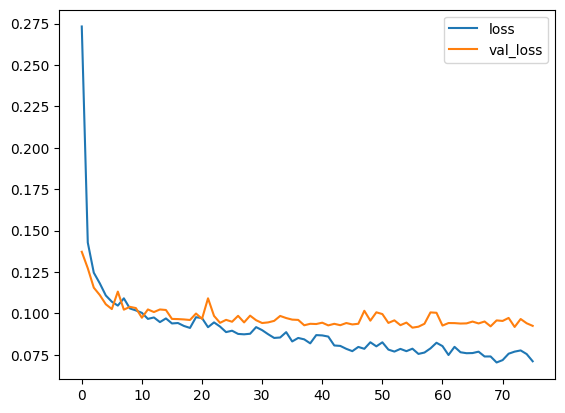

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

I sigurno, Keras je prekinuo trening puno prije punih 500 epoha!

# Tvoj zadatak #

Sada [**predvidi kako je pjesma popularna**](Overfitting_and_Underfitting_exercise_hr.ipynb) sa *Spotify* skupom podataka.